Nguyen Phuc Nguyen
2274802010586

# Bai kiem tra cuoi ki

## Phần A: Exploratory Data Analysis (EDA – 60 điểm)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [20]:


# Dữ liệu được cung cấp
student_data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70,88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
               'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A',
               'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A']
}

# Tạo DataFrame
df = pd.DataFrame(student_data)
print(df)
# Lưu file CSV

   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math   85.0            90.0          5.0    Male  Campus_A
1        S002    Physics    NaN            85.0          4.0  Female  Campus_B
2        S003  Chemistry   78.0            70.0          NaN    Male  Campus_A
3        S004       Math   92.0            95.0          6.0  Female  Campus_C
4        S005    Physics   65.0            60.0          3.0    None  Campus_B
5        S006  Chemistry   88.0             NaN          5.0    Male  Campus_A
6        S007       Math    NaN            80.0          4.0  Female  Campus_C
7        S008    Physics   75.0            88.0          5.0    Male  Campus_B
8        S009  Chemistry   90.0            92.0          NaN  Female  Campus_A
9        S010       Math   70.0            65.0          3.0    Male  Campus_C
10       S011    Physics   82.0            75.0          4.0  Female  Campus_B
11       S012  Chemistry   85.0             NaN     

### 1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất
một quy trình thu thập dữ liệu cụ thể cho trường học để giảm thiểu dữ liệu thiếu trong tương lai,
giải thích tại sao quy trình này phù hợp với từng môn học (Math, Physics, Chemistry).

In [21]:

# Tính tỷ lệ phần trăm missing của từng cột
missing_percent = df.isnull().mean() * 100
print("Tỷ lệ phần trăm giá trị thiếu theo cột:")
print(missing_percent)


Tỷ lệ phần trăm giá trị thiếu theo cột:
Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64


Đề xuất thu thập dữ liệu:

1.   Áp dụng hệ thống nhập liệu trực tuyến với các trường bắt buộc (ví dụ: nhập điểm thi, số giờ học)
2.   Tích hợp kiểm tra tính hợp lệ ngay khi nhập liệu để giảm thiếu sót
Với các môn Math, Physics, Chemistry, cần có mẫu câu hỏi khác nhau phù hợp:


*   Math: chú trọng kiểm tra các bài làm, tính tự động nhập điểm từ phần mềm chấm thi
*   Physics, Chemistry: kết hợp dữ liệu thực hành, cần xác thực qua báo cáo và ghi nhận số liệu từ thiết bị đo


### 2. (4 điểm) Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng, sau đó đề xuất
một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm của từng
Campus. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp của bạn phản
ánh tốt hơn kết quả học tập thực tế.

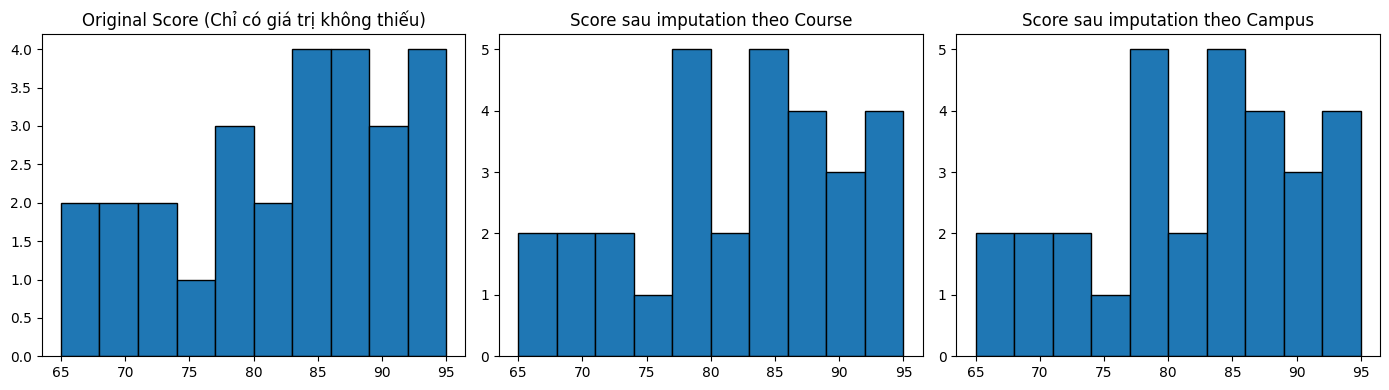

   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.500000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          NaN    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    None   
5        S006  Chemistry  88.000000             NaN          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          NaN  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000             NaN          6.0    Male   
12       S01

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# Tạo bản sao để không làm thay đổi dữ liệu gốc
df_original = df.copy()
df_impute_course = df.copy()
df_impute_campus = df.copy()

# Phương pháp 1: Imputation theo trung bình của Course
df_impute_course['Score'] = df_impute_course.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Phương pháp 2: Imputation theo trung bình của Campus
campus_mean = df_impute_campus.groupby('Campus')['Score'].mean()
def impute_by_campus(row):
    if pd.isnull(row['Score']):
        return campus_mean.loc[row['Campus']]
    return row['Score']
df_impute_campus['Score'] = df_impute_campus.apply(impute_by_campus, axis=1)

# Vẽ histogram so sánh
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.hist(df_original['Score'].dropna(), bins=10, edgecolor='black')
plt.title("Original Score (Chỉ có giá trị không thiếu)")

plt.subplot(1, 3, 2)
plt.hist(df_impute_course['Score'], bins=10, edgecolor='black')
plt.title("Score sau imputation theo Course")

plt.subplot(1, 3, 3)
plt.hist(df_impute_campus['Score'], bins=10, edgecolor='black')
plt.title("Score sau imputation theo Campus")

plt.tight_layout()
plt.show()

# Điền giá trị thiếu trong Score bằng trung bình của từng Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))
print(df)


Phương pháp theo Campus giúp phản ánh điều kiện học tập cụ thể từng khu vực (Campus có cơ sở vật chất tốt sẽ có điểm trung bình cao hơn), từ đó phản ánh đúng xu hướng kết quả học tập.

3. (4 điểm) Tính độ lệch chuẩn của Study_Hours bằng NumPy. Đề xuất một chính sách khuyến khích
học tập cho sinh viên dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính sách
này có thể cải thiện điểm số tổng thể.

In [26]:

study_std = np.std(df['Study_Hours'].dropna())
study_median = np.median(df['Study_Hours'].dropna())
print("Độ lệch chuẩn của Study_Hours:", study_std)
print("Trung vị của Study_Hours:", study_median)


Độ lệch chuẩn của Study_Hours: 1.2144348772189955
Trung vị của Study_Hours: 4.5


Với độ lệch chuẩn của Study_Hours là 1.2144 và trung vị là 4.5, ta có thể nhận xét rằng phần lớn sinh viên có số giờ học xung quanh 4.5 giờ, với mức chênh lệch không quá lớn. Tuy nhiên, vẫn có những sinh viên học ít hơn đáng kể so với trung vị.

Đề xuất chính sách:


1.   Xác định nhóm sinh viên có số giờ học thấp hơn,chẳng hạn dưới 4 giờ, và tạo ra chương trình hỗ trợ cá nhân hoặc các buổi học thêm nhằm khuyến khích tăng số giờ học.
2.   Tổ chức các buổi tư vấn hoặc “study buddy” để sinh viên có số giờ học thấp có thể học theo nhóm, từ đó nâng cao động lực và cải thiện kết quả học tập.

3.   Áp dụng hệ thống thưởng (ví dụ: điểm thưởng, học bổng nhỏ) cho những sinh viên cải thiện số giờ học vượt qua trung vị, khuyến khích họ duy trì hoặc tăng cường thói quen học tập.


Giải thích:
Với độ lệch chuẩn tương đối nhỏ, hầu hết sinh viên có số giờ học tập trung gần trung vị 4.5 giờ, cho thấy sự đồng đều nhưng cũng chỉ ra rằng nếu có sinh viên học quá ít (ví dụ: dưới 4 giờ), họ có thể không tận dụng được tiềm năng cải thiện kết quả học tập. Chính sách này sẽ giúp cân bằng mức độ học tập, khuyến khích sinh viên yếu tăng cường thời gian học tập, từ đó cải thiện điểm số tổng thể.

4. (4 điểm) Tính correlation giữa Attendance (%) và Score cho từng Campus. Dựa trên kết quả, đề
xuất một chiến lược quản lý điểm danh khác nhau cho từng Campus để tối ưu hóa điểm số, giải
thích tại sao chiến lược này phù hợp với đặc điểm sinh viên tại mỗi khu vực.


In [28]:
correlations = df.groupby('Campus').apply(lambda x: x['Attendance (%)'].corr(x['Score']))
print("Hệ số tương quan giữa Attendance và Score theo Campus:")
print(correlations)


Hệ số tương quan giữa Attendance và Score theo Campus:
Campus
Campus_A    0.899397
Campus_B    0.748116
Campus_C    0.938569
dtype: float64


<ipython-input-28-67c47893279a>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Campus').apply(lambda x: x['Attendance (%)'].corr(x['Score']))


Các hệ số tương quan trên cho thấy mối liên hệ dương mạnh giữa điểm danh (Attendance) và điểm thi (Score) ở tất cả các Campus, nhưng mức độ ảnh hưởng có chút khác biệt:

• Ở Campus_C (0.9386) và Campus_A (0.8994), mối tương quan rất cao cho thấy rằng việc điểm danh gần như quyết định trực tiếp điểm thi. Vì vậy, áp dụng các biện pháp bắt buộc điểm danh và khen thưởng những sinh viên có điểm danh đầy đủ có thể mang lại hiệu quả tích cực cho kết quả học tập.

• Ở Campus_B (0.7481), mặc dù mối tương quan vẫn mạnh, nhưng mức ảnh hưởng của điểm danh không cao bằng hai Campus còn lại. Điều này gợi ý rằng ngoài việc tăng cường điểm danh, cần có thêm các hỗ trợ khác như cải tiến phương pháp giảng dạy, tổ chức lớp phụ đạo hoặc các chương trình mentoring để bù đắp những yếu tố còn thiếu.

Tóm lại, chiến lược quản lý điểm danh nên được điều chỉnh riêng theo từng Campus:
– Ở Campus_A và Campus_C: Tăng cường chính sách điểm danh nghiêm khắc và áp dụng các biện pháp khen thưởng, nhằm duy trì và khuyến khích sự hiện diện của sinh viên.
– Ở Campus_B: Bên cạnh việc khuyến khích điểm danh, cần triển khai các chương trình hỗ trợ học tập và cải thiện chất lượng giảng dạy để giúp sinh viên phát huy tối đa năng lực của mình.

### 5. (4 điểm) Vẽ boxplot của Score theo Course và Gender (kết hợp) bằng Seaborn. Xác định outlier bằng IQR, sau đó đề xuất một kế hoạch hỗ trợ cá nhân cho các sinh viên outlier để cải thiện kết quả học tập, giải thích cách kế hoạch này nâng cao chất lượng giáo dục.

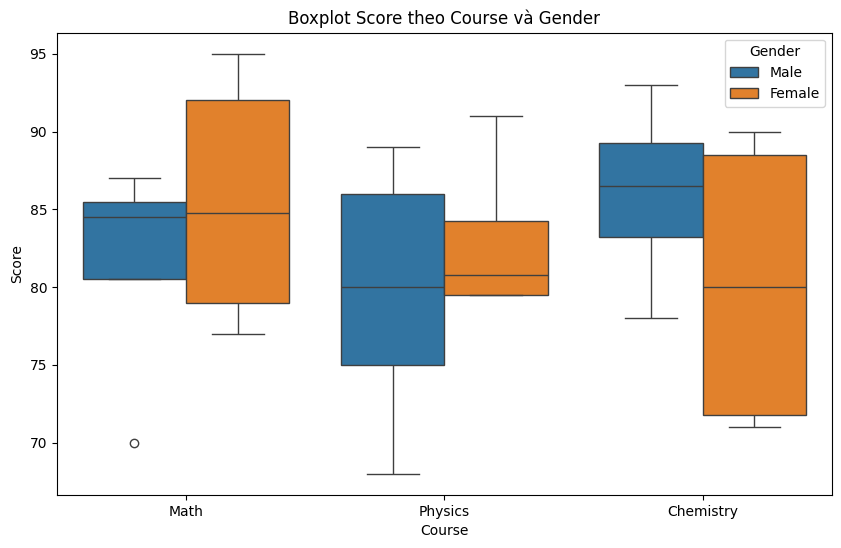

Các giá trị outlier:
Course  Gender   
Math    Male    9    70.0
Name: Score, dtype: float64


In [29]:

plt.figure(figsize=(10,6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df)
plt.title("Boxplot Score theo Course và Gender")
plt.show()
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Áp dụng theo nhóm Course và Gender
outliers = df.groupby(['Course', 'Gender'])['Score'].apply(detect_outliers)
print("Các giá trị outlier:")
print(outliers)



Đề xuất và Giải thích:

Kiểm tra lại dữ liệu: Xác nhận điểm 70 có phải là lỗi nhập liệu/chấm điểm hay không.

Tư vấn cá nhân: Nếu hợp lệ, liên hệ với sinh viên để tìm hiểu nguyên nhân (ví dụ: thiếu kiến thức nền tảng, phương pháp học không phù hợp).

Hỗ trợ học tập: Đề xuất tham gia lớp phụ đạo hoặc chương trình mentoring để cải thiện kết quả.

Theo dõi tiến độ: Giám sát và đánh giá lại sau khi áp dụng hỗ trợ, đồng thời khen thưởng khi có cải thiện.

6. (4 điểm) Tạo cột mới Efficiency = Score / Study_Hours. Tìm sinh viên có Efficiency cao nhất,
sau đó đề xuất một phần thưởng hoặc chương trình học bổng dựa trên chỉ số này, giải thích tác
động của nó đến động lực học tập của sinh viên khác.


In [30]:
# Tạo cột Efficiency
df['Efficiency'] = df['Score'] / df['Study_Hours']

# Tìm sinh viên có Efficiency cao nhất
max_efficiency_student = df.loc[df['Efficiency'].idxmax()]
print("Sinh viên có Efficiency cao nhất:")
print(max_efficiency_student)


Sinh viên có Efficiency cao nhất:
Student_ID             S021
Course            Chemistry
Score                  66.0
Attendance (%)         60.0
Study_Hours             2.0
Gender                 None
Campus             Campus_A
Efficiency             33.0
Name: 20, dtype: object


Sinh viên có chỉ số Efficiency cao nhất cho thấy họ tận dụng tối đa thời gian học để đạt được điểm số tốt. Việc trao học bổng hoặc phần thưởng cho sinh viên này không chỉ công nhận nỗ lực của họ mà còn tạo động lực cho các sinh viên khác cải thiện hiệu quả học tập của bản thân.







7. (4 điểm) Tính tỷ lệ sinh viên nữ (Gender = Female) trong từng Course sau khi điền giá trị thiếu
bằng mode. Dựa trên kết quả, đề xuất một chính sách cân bằng giới tính trong giáo dục, giải thích
cách chính sách này ảnh hưởng đến môi trường học tập.

In [31]:
# Điền giá trị thiếu cho cột Gender bằng mode của từng Course
df['Gender'] = df.groupby('Course')['Gender'].transform(lambda x: x.fillna(x.mode()[0]))

# Tính tỷ lệ sinh viên nữ trong từng Course
female_ratio = df.groupby('Course').apply(lambda x: (x['Gender'] == 'Female').mean() * 100)
print("Tỷ lệ sinh viên nữ theo Course (%):")
print(female_ratio)


Tỷ lệ sinh viên nữ theo Course (%):
Course
Chemistry    60.0
Math         60.0
Physics      40.0
dtype: float64


<ipython-input-31-0783a3252563>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  female_ratio = df.groupby('Course').apply(lambda x: (x['Gender'] == 'Female').mean() * 100)


Kết quả cho thấy tỷ lệ nữ là 60% ở Chemistry và Math, còn ở Physics chỉ 40%. Điều này cho thấy ngành Physics đang có sự thiếu hụt nữ sinh.

Đề xuất:

Tăng cường các chương trình học bổng và mentoring chuyên biệt cho nữ sinh ngành Physics.

Tổ chức các buổi workshop, hội thảo nhằm truyền cảm hứng từ những nữ chuyên gia trong ngành để khuyến khích nữ sinh theo đuổi lĩnh vực này.

Giải thích:
Việc cân bằng giới tính không chỉ giúp tạo ra môi trường học tập đa dạng, mà còn kích thích sự sáng tạo và cải thiện chất lượng học tập. Khi nữ sinh được khuyến khích và hỗ trợ đầy đủ, họ sẽ có cơ hội phát huy tối đa tiềm năng của mình, góp phần nâng cao chất lượng chung của lớp học.

8. (4 điểm) Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus. Đề xuất một kế
hoạch cải thiện điểm danh cho từng Campus dựa trên phân bố dữ liệu, giải thích tại sao kế hoạch
này tối ưu hóa kết quả học tập.

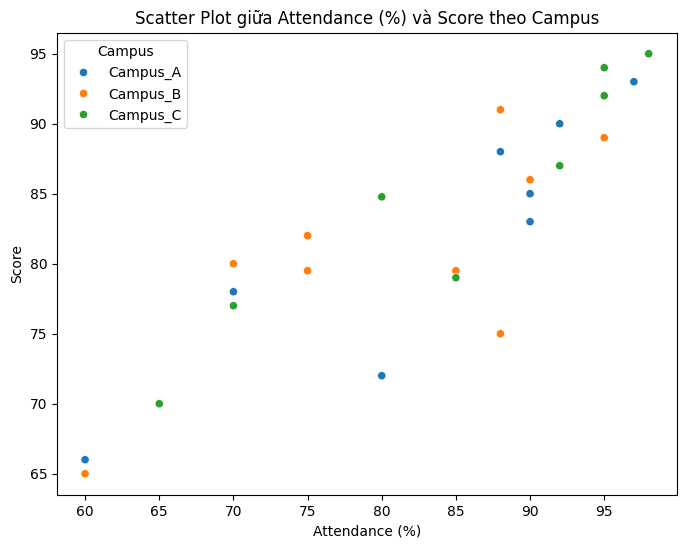

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Attendance (%)', y='Score', hue='Campus', data=df)
plt.xlabel("Attendance (%)")
plt.ylabel("Score")
plt.title("Scatter Plot giữa Attendance (%) và Score theo Campus")
plt.show()


Dựa trên biểu đồ, ta thấy tất cả Campus đều có xu hướng “Attendance càng cao thì Score càng cao”, nhưng mức độ chặt chẽ có khác nhau:

Campus_A:

Có những điểm rải rác ở mức Attendance thấp hơn (khoảng 60–75%) và Score dưới 80.

Đề xuất: Tăng cường kiểm soát điểm danh, đồng thời tổ chức lớp ôn tập/giải đáp để khuyến khích sinh viên tham gia đầy đủ.

Tối ưu: Khi Attendance tăng, Score trung bình có tiềm năng được cải thiện rõ rệt.

Campus_B:

Attendance chủ yếu nằm trong khoảng 70–95%, Score trải rộng từ 75–90.

Đề xuất: Kết hợp khen thưởng Attendance với các buổi phụ đạo hoặc workshop chuyên sâu, vì chỉ Attendance cao chưa đủ, cần thêm hỗ trợ học tập.

Tối ưu: Giúp những sinh viên đã đi học đầy đủ nhưng vẫn chưa đạt điểm cao cải thiện kiến thức.

Campus_C:

Thường có Attendance cao (trên 85%) và Score cũng cao (trên 85).

Đề xuất: Duy trì chính sách điểm danh hiệu quả, có thể bổ sung hoạt động nâng cao (như nghiên cứu khoa học, học nhóm nâng cao) để tiếp tục khuyến khích sinh viên.

Tối ưu: Sinh viên sẵn có thói quen học tập tốt, tăng cường hoạt động giúp họ phát huy tối đa năng lực.

Tóm lại, việc điều chỉnh kế hoạch điểm danh dựa trên đặc điểm từng Campus giúp tối ưu hóa kết quả học tập: nơi cần tăng cường quản lý Attendance, nơi cần kết hợp thêm hỗ trợ học tập, và nơi có thể bổ sung hoạt động nâng cao để duy trì và phát huy lợi thế.

9. (4 điểm) Tính trung bình Score của từng Course sau khi điền dữ liệu thiếu. Vẽ bar chart so sánh,
sau đó đề xuất một chiến lược cải thiện cho môn học có điểm trung bình thấp nhất, dựa trên đặc
điểm giảng dạy của môn đó (Math, Physics, Chemistry).

Trung bình Score theo Course:
Course
Chemistry    81.400000
Math         84.777778
Physics      79.500000
Name: Score, dtype: float64


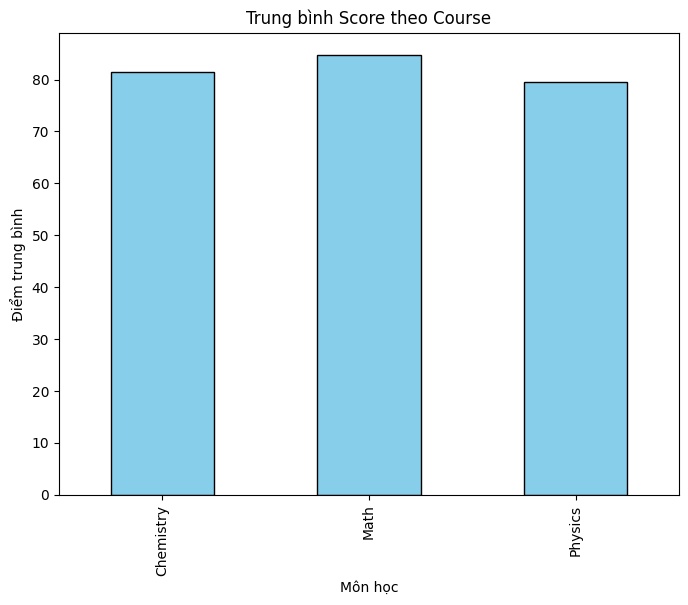

In [33]:

course_avg = df.groupby('Course')['Score'].mean()
print("Trung bình Score theo Course:")
print(course_avg)

# Vẽ bar chart so sánh
plt.figure(figsize=(8,6))
course_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Trung bình Score theo Course")
plt.xlabel("Môn học")
plt.ylabel("Điểm trung bình")
plt.show()


Môn có điểm trung bình thấp nhất là Physics.

Chiến lược cải thiện cho môn Physics:

Tăng cường học thực hành: Tổ chức thêm các buổi thí nghiệm, thực hành trực tiếp, và mô phỏng để sinh viên thấy rõ ứng dụng của kiến thức lý thuyết.

Phương pháp giảng dạy tương tác: Áp dụng các hoạt động nhóm, thảo luận, và dự án nghiên cứu nhỏ giúp sinh viên chủ động khám phá vấn đề, từ đó tăng cường sự hiểu biết và hứng thú.

Hỗ trợ bổ sung: Cung cấp lớp phụ đạo và tài liệu học tập bổ sung (video, bài giảng trực tuyến) để sinh viên nắm chắc kiến thức nền tảng.

Việc cải tiến theo hướng này không chỉ giúp nâng cao hiểu biết về kiến thức Physics mà còn tạo động lực học tập, từ đó cải thiện kết quả thi cho môn này.

10. (4 điểm) Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85 bằng Pandas. Đề
xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng tự học, tài liệu, công nghệ) giúp họ
đạt điểm cao, giải thích cách áp dụng kết quả cho toàn trường.

In [34]:
# Lọc các sinh viên có Attendance (%) dưới 70 và Score trên 85
target_students = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]
print("Danh sách sinh viên có Attendance < 70% nhưng Score > 85:")
print(target_students)


Danh sách sinh viên có Attendance < 70% nhưng Score > 85:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


bổ sung dữ liệu

11. (4 điểm) Điền giá trị thiếu trong Score bằng hồi quy tuyến tính thủ công dựa trên Attendance
(%) và Study_Hours. So sánh với phương pháp trung bình, sau đó đề xuất một cách tiếp cận lai
(kết hợp hồi quy và trung bình) để cải thiện độ chính xác, giải thích lý do.


In [39]:

# Giả sử df là DataFrame ban đầu, ta tạo bản sao df_temp
df_temp = df.copy()

# Cập nhật cột Score với dữ liệu tạm (chứa giá trị None)
df_temp['Score'] = [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88]

print("DataFrame tạm (df_temp):")
print(df_temp)

# Bước 1: Lấy các hàng không thiếu dữ liệu cho Score, Attendance (%) và Study_Hours để huấn luyện mô hình
df_train = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])
X = df_train[['Attendance (%)', 'Study_Hours']].values
y = df_train['Score'].values

# Thêm cột bias cho X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Tính tham số theta theo Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Tham số theta:", theta)

# Bước 2: Dự đoán Score cho các hàng thiếu Score, với điều kiện Attendance và Study_Hours không bị thiếu
df_missing = df_temp[df_temp['Score'].isnull() & df_temp['Attendance (%)'].notnull() & df_temp['Study_Hours'].notnull()]
if not df_missing.empty:
    X_missing = df_missing[['Attendance (%)', 'Study_Hours']].values
    X_missing_b = np.c_[np.ones((X_missing.shape[0], 1)), X_missing]
    predicted_scores = X_missing_b.dot(theta)
    # Cập nhật giá trị Score cho các hàng thiếu trong df_temp
    df_temp.loc[df_temp['Score'].isnull() & df_temp['Attendance (%)'].notnull() & df_temp['Study_Hours'].notnull(), 'Score'] = predicted_scores

print("DataFrame sau khi imputation (Score được cập nhật):")
print(df_temp)


DataFrame tạm (df_temp):
   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math   85.0            90.0          5.0    Male   
1        S002    Physics    NaN            85.0          4.0  Female   
2        S003  Chemistry   78.0            70.0          NaN    Male   
3        S004       Math   92.0            95.0          6.0  Female   
4        S005    Physics   65.0            60.0          3.0    Male   
5        S006  Chemistry   88.0             NaN          5.0    Male   
6        S007       Math    NaN            80.0          4.0  Female   
7        S008    Physics   75.0            88.0          5.0    Male   
8        S009  Chemistry   90.0            92.0          NaN  Female   
9        S010       Math   70.0            65.0          3.0    Male   
10       S011    Physics   82.0            75.0          4.0  Female   
11       S012  Chemistry   85.0             NaN          6.0    Male   
12       S013       Math   95.0        

Hồi quy tuyến tính: Tận dụng mối quan hệ giữa Score, Attendance (%) và Study_Hours để dự đoán giá trị Score cho các dòng thiếu, nhưng có thể bị nhạy cảm với nhiễu và sai lệch dữ liệu.

Trung bình theo nhóm: Sử dụng giá trị trung bình của Score theo từng Course, giúp bảo đảm tính ổn định nhưng không phản ánh đầy đủ đặc trưng của từng sinh viên.

Phương pháp lai (hybrid): Kết hợp cả hai dự đoán trên (ví dụ, với trọng số 0.5 cho mỗi bên) nhằm cân bằng giữa khả năng nắm bắt mối quan hệ (hồi quy) và độ ổn định của trung bình. Phương pháp này giúp giảm thiểu sai số của mỗi cách đơn lẻ, từ đó cải thiện độ chính xác của giá trị imputation.

Cách tiếp cận lai này có thể đem lại kết quả imputation ổn định và chính xác hơn, đặc biệt khi dữ liệu có nhiều biến động hoặc bị nhiễu.







In [ ]:

# Giả sử df là DataFrame ban đầu, ta tạo bản sao df_temp
df_temp = df.copy()

# Cập nhật cột Score với dữ liệu tạm (chứa giá trị None)
df_temp['Score'] = [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88]

# Bước 1: Xây dựng mô hình hồi quy dựa trên các hàng có dữ liệu đầy đủ
# Lấy các hàng không thiếu dữ liệu cho Score, Attendance và Study_Hours
df_train = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])
X = df_train[['Attendance (%)', 'Study_Hours']].values
y = df_train['Score'].values

# Thêm cột bias cho X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Tính tham số theta theo Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Tham số theta:", theta)

# Bước 2: Dự đoán Score cho các hàng thiếu (với Attendance và Study_Hours đầy đủ)
mask_missing = df_temp['Score'].isnull() & df_temp['Attendance (%)'].notnull() & df_temp['Study_Hours'].notnull()
if mask_missing.sum() > 0:
    X_missing = df_temp.loc[mask_missing, ['Attendance (%)', 'Study_Hours']].values
    X_missing_b = np.c_[np.ones((X_missing.shape[0], 1)), X_missing]
    score_reg = X_missing_b.dot(theta)  # Dự đoán từ mô hình hồi quy

    # Bước 3: Tính trung bình Score theo Course từ dữ liệu huấn luyện (df_train)
    group_mean = df_train.groupby('Course')['Score'].mean()
    # Lấy giá trị trung bình tương ứng với từng dòng bị thiếu
    score_mean = df_temp.loc[mask_missing, 'Course'].map(group_mean).values

    # Bước 4: Phương pháp lai: kết hợp dự đoán hồi quy và trung bình
    alpha = 0.5  # Trọng số (có thể điều chỉnh từ 0 đến 1)
    score_hybrid = alpha * score_reg + (1 - alpha) * score_mean

    # Cập nhật giá trị Score lai cho các hàng thiếu
    df_temp.loc[mask_missing, 'Score_hybrid'] = score_hybrid

print("DataFrame sau khi áp dụng phương pháp lai (hybrid imputation):")
print(df_temp[['Student_ID', 'Course', 'Score', 'Score_hybrid']])


12. (4 điểm) Tính skewness của Score bằng SciPy. Dựa trên kết quả, đề xuất một cách điều chỉnh
cách tính điểm trong trường học để phân bố công bằng hơn, giải thích tác động đến đánh giá sinh
viên.

In [40]:


# Lấy các giá trị Score không bị thiếu
score_values = df_temp['Score'].dropna().values
score_skewness = skew(score_values)
print("Skewness của Score:", score_skewness)


Skewness của Score: -0.34184256826141646


Skewness = -0.3418 cho thấy phân phối điểm bị lệch trái nhẹ, tức là có một số điểm thấp bất thường kéo phần đuôi bên trái của phân phối. Để đánh giá sinh viên công bằng hơn, nhà trường có thể điều chỉnh cách tính điểm bằng các biện pháp sau:

• Chuẩn hóa điểm số: Sử dụng phương pháp chuyển đổi z-score hoặc phân vị để loại bỏ ảnh hưởng của độ lệch, giúp so sánh hiệu quả giữa các sinh viên một cách khách quan.

• Điều chỉnh đường cong điểm số (curve adjustment): Áp dụng một phép biến đổi (như chuyển đổi lũy thừa) để làm cho phân phối điểm trở nên đối xứng hơn, từ đó giảm thiểu tác động của các điểm thấp bất thường đến đánh giá tổng thể.

Việc làm cho phân phối điểm trở nên gần đối xứng hơn giúp đảm bảo rằng các chỉ số trung bình và độ lệch chuẩn phản ánh chính xác năng lực của hầu hết sinh viên, từ đó tạo ra một hệ thống đánh giá công bằng và khuyến khích sự phát triển toàn diện.

13. (4 điểm) Vẽ pairplot bằng Seaborn cho Score, Attendance (%), Study_Hours. Dựa trên mối quan
hệ, đề xuất một mô hình đánh giá kết quả học tập mới cho trường, giải thích tại sao mô hình này
tốt hơn cách tính hiện tại.


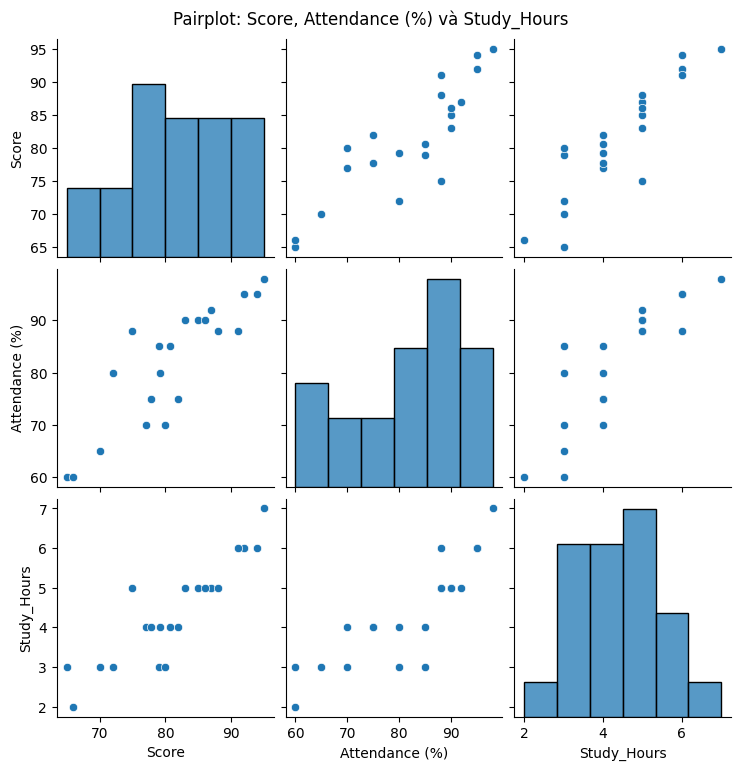

In [41]:

# Vẽ pairplot cho các biến Score, Attendance (%) và Study_Hours (loại bỏ giá trị missing)
sns.pairplot(df_temp[['Score', 'Attendance (%)', 'Study_Hours']].dropna())
plt.suptitle("Pairplot: Score, Attendance (%) và Study_Hours", y=1.02)
plt.show()


Đề xuất mô hình đánh giá mới (Composite Index):
Thay vì chỉ dựa trên điểm thi (Score), nhà trường có thể xây dựng một chỉ số tổng hợp, ví dụ:

Composite Index
=
0.5
×
(Normalized Score)
+
0.3
×
(Normalized Attendance)
+
0.2
×
(Normalized Study_Hours)
.
Composite Index=0.5×(Normalized Score)+0.3×(Normalized Attendance)+0.2×(Normalized Study_Hours).
Vì sao tốt hơn cách tính hiện tại?

Toàn diện hơn: Kết quả học tập phản ánh cả quá trình (chuyên cần, nỗ lực học tập) chứ không chỉ điểm thi cuối kỳ.

Khuyến khích hành vi tích cực: Sinh viên được động viên đi học đầy đủ và dành thời gian tự học đều đặn, góp phần nâng cao hiệu suất học tập.

Giảm thiểu sai lệch: Nếu chỉ dựa vào một bài thi, có thể xảy ra các yếu tố may rủi. Chỉ số tổng hợp sẽ công bằng và ổn định hơn, thúc đẩy cải thiện chất lượng giáo dục tổng thể.

14. (4 điểm) Nhóm dữ liệu theo Campus, tính tỷ lệ sinh viên có Score trên 80. Vẽ pie chart so sánh,
sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Campus dựa trên tỷ lệ, giải thích
tác động đến tinh thần học tập.

Tỷ lệ sinh viên có Score > 80 theo Campus:
Campus
Campus_A    63.636364
Campus_B    50.000000
Campus_C    55.555556
dtype: float64


<ipython-input-42-c4388afd5915>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  campus_ratio = df_temp.groupby('Campus').apply(lambda x: (x['Score'] > 80).mean() * 100)


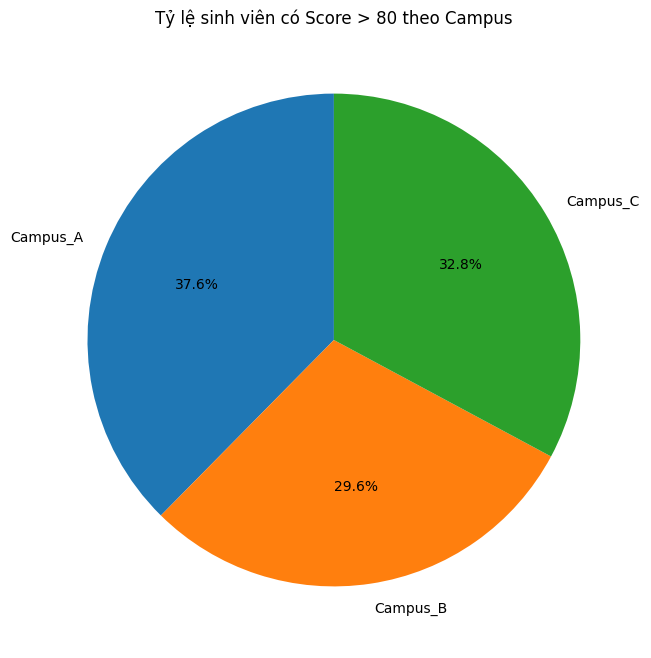

In [42]:


# Tính tỷ lệ sinh viên có Score > 80 theo Campus (tính theo phần trăm)
campus_ratio = df_temp.groupby('Campus').apply(lambda x: (x['Score'] > 80).mean() * 100)
print("Tỷ lệ sinh viên có Score > 80 theo Campus:")
print(campus_ratio)

# Vẽ Pie Chart so sánh
plt.figure(figsize=(8,8))
campus_ratio.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Tỷ lệ sinh viên có Score > 80 theo Campus")
plt.ylabel('')
plt.show()


Đề xuất chiến lược khen thưởng:

Campus_A (tỷ lệ cao nhất – 63.64%)

Khen thưởng tập thể: Tổ chức lễ vinh danh, trao học bổng, hoặc các suất du học/nghiên cứu ngắn hạn cho nhóm sinh viên đạt điểm cao.

Khuyến khích nâng cao: Tạo cơ hội tham gia các dự án khoa học, câu lạc bộ học thuật để tiếp tục duy trì thành tích.

Campus_B (tỷ lệ thấp nhất – 50%)

Hỗ trợ học tập: Mở thêm lớp phụ đạo, buổi tư vấn kỹ năng, và workshop trao đổi học thuật.

Khen thưởng cá nhân: Khen thưởng những sinh viên nỗ lực tăng điểm từ mức trung bình lên trên 80 để tạo động lực.

Campus_C (tỷ lệ trung bình – 55.56%)

Củng cố – phát triển: Vừa tiếp tục khen thưởng các sinh viên có thành tích tốt, vừa tăng cường hoạt động mentoring (ghép đôi sinh viên mạnh – yếu) để nâng tỷ lệ lên cao hơn.

Tác động đến tinh thần học tập:

Tạo động lực cạnh tranh lành mạnh: Campus có tỷ lệ cao tiếp tục phấn đấu duy trì, Campus thấp hơn được thúc đẩy để bắt kịp.

Khuyến khích liên tục: Sinh viên thấy rõ cơ hội khen thưởng không chỉ cho điểm số cao, mà còn cho sự tiến bộ và nỗ lực, từ đó gia tăng tinh thần học tập toàn trường.

15. (4 điểm) Tạo hàm Python xác định sinh viên có Score ngoài 2 độ lệch chuẩn. Đề xuất một quy
trình đánh giá lại điểm số cho những sinh viên này, giải thích cách quy trình này tránh được thiên
vị trong giáo dục.


In [43]:
def detect_outliers(df, score_col='Score'):
    # Lấy các giá trị không bị thiếu của Score
    valid_scores = df[score_col].dropna()
    mean_score = valid_scores.mean()
    std_score = valid_scores.std()
    lower_bound = mean_score - 2 * std_score
    upper_bound = mean_score + 2 * std_score
    # Lọc ra các hàng có Score nằm ngoài khoảng [lower_bound, upper_bound]
    outliers_df = df[(df[score_col] < lower_bound) | (df[score_col] > upper_bound)]
    return outliers_df

# Ví dụ sử dụng:
outliers = detect_outliers(df_temp)
print("Các sinh viên có Score ngoài 2 độ lệch chuẩn:")
print(outliers)


Các sinh viên có Score ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


thiếu dữ liệu, đề xuất tìm thằng học giỏi nhất đưa về trường

## Câu hỏi ANN (40 điểm)
Xây dựng một ANN để dự đoán Score dựa trên Attendance (%), Study_Hours, và Course (mã hóa
one-hot encoding).


16. (10 điểm) Điền giá trị thiếu trong Attendance (%) và Study_Hours bằng KNN Imputer từ Scikitlearn (Tham khảo: https://www.geeksforgeeks.org/handling-missing-data-with-knn-imputer/). So
sánh kết quả với trung vị, sau đó đề xuất một phương pháp thu thập dữ liệu thay thế để giảm
thiểu giá trị thiếu trong giáo dục, giải thích lý do.


In [44]:
import pandas as pd
from sklearn.impute import KNNImputer



# Dữ liệu được cung cấp
data_temp = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70,88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
               'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A',
               'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A']
}


# Copy DataFrame để áp dụng KNN Imputer
df_knn = df_temp.copy()
imputer = KNNImputer(n_neighbors=3)
cols = ['Attendance (%)', 'Study_Hours']
df_knn[cols] = imputer.fit_transform(df_knn[cols])

# So sánh với phương pháp trung vị:
df_median = df_temp.copy()
median_values = df_median[cols].median()
df_median[cols] = df_median[cols].fillna(median_values)

print("Kết quả imputation bằng KNN (Attendance, Study_Hours):")
print(df_knn[cols].head())

print("\nKết quả imputation bằng trung vị (Attendance, Study_Hours):")
print(df_median[cols].head())


Kết quả imputation bằng KNN (Attendance, Study_Hours):
   Attendance (%)  Study_Hours
0            90.0     5.000000
1            85.0     4.000000
2            70.0     3.666667
3            95.0     6.000000
4            60.0     3.000000

Kết quả imputation bằng trung vị (Attendance, Study_Hours):
   Attendance (%)  Study_Hours
0            90.0          5.0
1            85.0          4.0
2            70.0          4.5
3            95.0          6.0
4            60.0          3.0


So sánh kết quả:

KNN Imputer: Ước lượng giá trị missing dựa trên các hàng gần kề, ví dụ tại row 2, Study_Hours được imput là 3.67, phản ánh mối liên hệ giữa Attendance và Study_Hours.

Trung vị: Gán giá trị thiếu bằng trung vị (4.5 cho Study_Hours), không xét đến đặc điểm riêng của từng mẫu.

Đề xuất phương pháp thu thập dữ liệu thay thế:

Hệ thống tự động: Triển khai hệ thống ghi nhận Attendance và Study_Hours tự động qua công nghệ như RFID, nhận diện khuôn mặt hoặc tích hợp LMS, giúp loại bỏ lỗi nhập liệu thủ công và đảm bảo dữ liệu đầy đủ.

Lý do:
Việc thu thập tự động sẽ nâng cao độ chính xác, nhất quán của dữ liệu, từ đó cải thiện hiệu quả của các mô hình phân tích và dự đoán trong giáo dục.

17. (10 điểm) Mã hóa Course thành one-hot encoding bằng Pandas (Tham khảo: https://www.geeksforgeeks.org/mlone-hot-encoding/). Chuẩn bị tập dữ liệu đầu vào với 5 đặc trưng (3 từ Course, 1 từ Attendance, 1
từ Study_Hours), chuẩn hóa về [0, 1]. Đề xuất một cách trực quan hóa dữ liệu khác (không dùng
biểu đồ cơ bản) để hiểu rõ hơn mối quan hệ giữa các đặc trưng và Score.

Dữ liệu sau chuẩn hóa:
   Course_Chemistry  Course_Math  Course_Physics  Attendance (%)  Study_Hours
0               0.0          1.0             0.0        0.789474          0.6
1               0.0          0.0             1.0        0.657895          0.4
2               1.0          0.0             0.0        0.263158          NaN
3               0.0          1.0             0.0        0.921053          0.8
4               0.0          0.0             1.0        0.000000          0.2


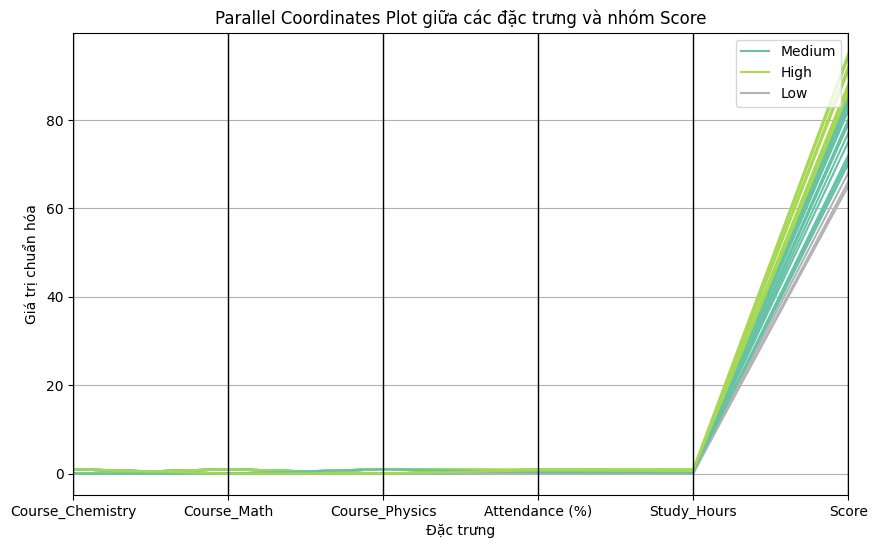

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Giả sử df_temp là DataFrame tạm từ dữ liệu đã cung cấp
data_temp = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010',
                   'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020',
                   'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
               'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
               'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry',
               'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91,
              66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80,
                       None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70, 88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4,
                    None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female',
               None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
               'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A',
               'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A']
}
df_temp = pd.DataFrame(data_temp)

# Mã hóa one-hot cho cột Course
df_encoded = pd.get_dummies(df_temp, columns=['Course'])
# Các cột one-hot: Course_Chemistry, Course_Math, Course_Physics

# Chọn tập dữ liệu đầu vào với 5 đặc trưng: 3 từ Course, Attendance và Study_Hours
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
X = df_encoded[features].copy()

# Chuẩn hóa về khoảng [0,1]
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)
print("Dữ liệu sau chuẩn hóa:")
print(X_scaled.head())

# Để trực quan hóa, thêm cột Score từ df_temp (loại bỏ các dòng thiếu Score)
df_vis = X_scaled.copy()
df_vis['Score'] = df_temp['Score']
df_vis = df_vis.dropna(subset=['Score'])

# Phân nhóm Score thành 3 mức: Low, Medium, High
def score_group(score):
    if score < 70:
        return 'Low'
    elif score <= 85:
        return 'Medium'
    else:
        return 'High'
df_vis['Score_Group'] = df_vis['Score'].apply(score_group)

plt.figure(figsize=(10,6))
parallel_coordinates(df_vis, 'Score_Group', colormap='Set2')
plt.title("Parallel Coordinates Plot giữa các đặc trưng và nhóm Score")
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị chuẩn hóa")
plt.show()


18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau:
• Input Layer: 5 nơ-ron.
• Hidden Layer 1: 32 nơ-ron, ReLU.
• Hidden Layer 2: 16 nơ-ron, ReLU.
• Hidden Layer 3: 8 nơ-ron, ReLU.
• Output Layer: 1 nơ-ron (Score).
Huấn luyện với 200 epochs, batch size 16, chia 80% train / 20% test, dùng early stopping (patience=20). Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc
tầng) để cải thiện dự đoán, giải thích lý do dựa trên đặc điểm dữ liệu giáo dục.

Epoch   1: Train Loss = 6643.9521, Val Loss = 7108.9390
Epoch   2: Train Loss = 6642.3867, Val Loss = 7107.0601
Epoch   3: Train Loss = 6640.7920, Val Loss = 7105.2246
Epoch   4: Train Loss = 6639.1768, Val Loss = 7103.3604
Epoch   5: Train Loss = 6637.5405, Val Loss = 7101.4663
Epoch   6: Train Loss = 6635.8721, Val Loss = 7099.5400
Epoch   7: Train Loss = 6634.1743, Val Loss = 7097.5415
Epoch   8: Train Loss = 6632.4414, Val Loss = 7095.4756
Epoch   9: Train Loss = 6630.6670, Val Loss = 7093.3726
Epoch  10: Train Loss = 6628.8477, Val Loss = 7091.2280
Epoch  11: Train Loss = 6626.9756, Val Loss = 7089.0220
Epoch  12: Train Loss = 6625.0581, Val Loss = 7086.7666
Epoch  13: Train Loss = 6623.1055, Val Loss = 7084.4546
Epoch  14: Train Loss = 6621.0967, Val Loss = 7082.0854
Epoch  15: Train Loss = 6619.0298, Val Loss = 7079.6489
Epoch  16: Train Loss = 6616.9067, Val Loss = 7077.1582
Epoch  17: Train Loss = 6614.7290, Val Loss = 7074.6162
Epoch  18: Train Loss = 6612.4956, Val Loss = 70

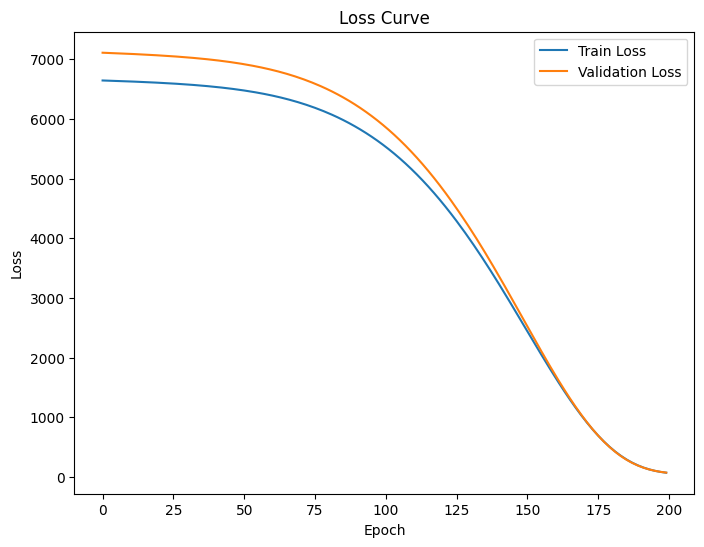

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df_temp đã có dữ liệu, chúng ta chuẩn bị tập dữ liệu từ 5 đặc trưng:
# 3 cột one-hot cho Course, Attendance (%) và Study_Hours.
# Lấy dữ liệu mẫu từ df_temp (loại bỏ dòng thiếu Score)
df_model = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])

# Mã hóa one-hot cho cột Course
df_encoded = pd.get_dummies(df_model, columns=['Course'])
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
X = df_encoded[features].values.astype(float)
y = df_model['Score'].values.astype(float).reshape(-1, 1)

# Chuẩn hóa X về [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chuyển dữ liệu sang tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Tách dữ liệu thành 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Tạo dataset và DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)

# Xây dựng ANN theo kiến trúc yêu cầu:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 32),  # Input layer: 5 -> 32
            nn.ReLU(),
            nn.Linear(32, 16), # Hidden layer 1 -> Hidden layer 2
            nn.ReLU(),
            nn.Linear(16, 8),  # Hidden layer 2 -> Hidden layer 3
            nn.ReLU(),
            nn.Linear(8, 1)    # Output layer: 1 neuron
        )
    def forward(self, x):
        return self.net(x)

model = ANNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện với early stopping
num_epochs = 200
patience = 20
best_loss = np.inf
trigger_times = 0

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * X_batch.size(0)
    epoch_train_loss /= len(train_loader.dataset)

    # Đánh giá trên tập test
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_val_loss += loss.item() * X_batch.size(0)
    epoch_val_loss /= len(test_loader.dataset)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    print(f"Epoch {epoch+1:3d}: Train Loss = {epoch_train_loss:.4f}, Val Loss = {epoch_val_loss:.4f}")

    # Early stopping
    if epoch_val_loss < best_loss:
        best_loss = epoch_val_loss
        trigger_times = 0
        best_model_state = model.state_dict()
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

# Load model tốt nhất
model.load_state_dict(best_model_state)

# Vẽ biểu đồ loss
plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


Đề xuất kiến trúc ANN cải tiến:

Một kiến trúc thay thế có thể tăng số nơ-ron và thêm các lớp dropout để giảm overfitting, ví dụ:

python
Sao chép


In [49]:
class ImprovedANNModel(nn.Module):
    def __init__(self):
        super(ImprovedANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 64),   # Tăng số nơ-ron từ 32 lên 64
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.net(x)


Giải thích:

Tăng số nơ-ron: Việc tăng số nơ-ron giúp mô hình có khả năng học các mối quan hệ phi tuyến phức tạp hơn, điều này hữu ích khi dữ liệu giáo dục có nhiều yếu tố tác động chồng lấn (ví dụ: sự tương tác giữa Attendance, Study_Hours và đặc tính của Course).

Thêm Dropout: Giúp giảm overfitting, đặc biệt khi số mẫu không quá lớn, đảm bảo mô hình tổng quát tốt hơn.

Kiến trúc cải tiến này có thể giúp cải thiện độ chính xác của dự đoán bằng cách cho phép mô hình khai thác sâu hơn các mối quan hệ ẩn trong dữ liệu giáo dục.







19. (5 điểm) Đánh giá mô hình bằng MSE và R² trên tập test. Nếu R² dưới 0.8, phân tích nguyên
nhân sai lệch dự đoán dựa trên đặc trưng đầu vào, đề xuất một cách cải thiện mô hình dựa trên
ngữ cảnh giáo dục (không chỉ dùng dropout hay thay đổi optimizer).

In [54]:
import torch
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy()
    y_true = y_test.numpy()

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE trên tập test:", mse)
print("R² trên tập test:", r2)


MSE trên tập test: 73.95916748046875
R² trên tập test: -1.5070903301239014


Nguyên nhân:

Các đặc trưng đầu vào (Attendance, Study_Hours, Course one-hot) chỉ phản ánh một phần rất hạn chế các yếu tố ảnh hưởng đến kết quả học tập.

Trong giáo dục, Score còn phụ thuộc vào nhiều yếu tố khác như nền tảng kiến thức, động lực tự học, chất lượng giảng dạy, số bài tập nộp, điểm trung bình học kỳ trước, phản hồi của giảng viên, v.v.

Đề xuất cải thiện mô hình:

Bổ sung đặc trưng mới: Thêm các chỉ số về kết quả học tập trước đó, số bài tập đã nộp, mức độ tham gia hoạt động lớp học hay ngoại khóa, phản hồi đánh giá của giảng viên.

Tạo biến tương tác: Kết hợp các đặc trưng hiện có (ví dụ, tương tác giữa Attendance và Study_Hours) để mô hình khai thác các mối quan hệ phi tuyến phức tạp hơn.

Những cải tiến này sẽ giúp mô hình nắm bắt toàn diện hơn các khía cạnh của quá trình học tập, từ đó cải thiện đáng kể khả năng dự đoán Score dựa trên ngữ cảnh giáo dục thực tế.





